# XGBooster Ensemble Algorithm
- XGBooster Algorithm is used to convert the original data into the subset data and given a mode to add all models.
- Boostin is a an ensemble modeling technique that is used to bulid a strong classifier from the number of weak classifier
it is done by building a model by using weak models in series. 
- The weak classifier is trained on the data and the error is calculated. The model with the highest
error is selected and the data is weighted based on the error. The model is then trained on the
weighted data and the process is repeated until the desired number of models is reached.
- The final model is a weighted sum of all the models trained in the previous steps.
- The XGBooster algorithm is used to convert the original data into the subset data and given
a mode to add all models.

## Logics behind the XGBooster:
- The XGBooster is a gradient boosting algorithm that uses a decision tree as the base learner.
-The algorithm works by iteratively adding decision trees to the model, with each new tree attempting to correct
the errors made by the previous trees. The final prediction is made by summing the predictions of all
the trees.
-The XGBooster uses a variety of techniques to improve the accuracy and efficiency of the model,
including:
1.   **Gradient boosting**: The algorithm uses gradient boosting to iteratively add decision trees to the model
2.   **Decision trees**: The base learner is a decision tree, which is a simple and interpre
able model
3.   **Regularization**: The algorithm uses regularization to prevent overfitting and improve the generaliz
ability of the model
4.  **Handling missing values**: The algorithm can handle missing values in the data, and can be
configured to impute missing values using a variety of methods
The XGBooster is a powerful and flexible algorithm that can be used for a wide range of
classification and regression tasks.

## A comparision b/w XGBooster , Random Forest & Decision Tree on the bases of Classification

***Importing the libraries***

In [30]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Import the Machine Learning Scikit learn library from sklearn & ensemble library XGBooster***

In [31]:
#Import the sklearn & XGBooster:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [32]:
#Import the dataset:
df = sns.load_dataset('tips') 

In [33]:
#Check the dataset:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
#Check the types of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill', ylabel='tip'>

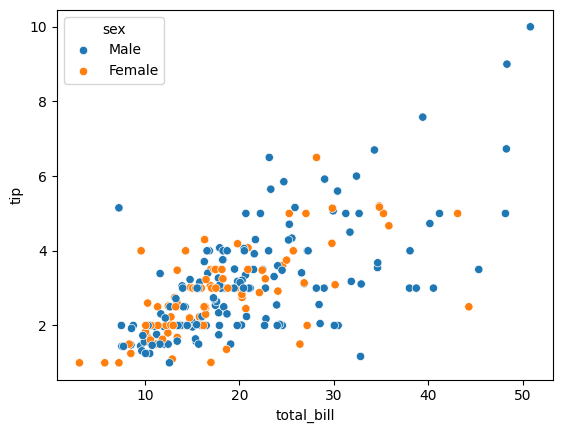

In [35]:
#Make a Scatter Plot of dataset:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex' )

In [36]:
#Apply the label Encober for object and categorical data:
le  = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
     df[i] = le.fit_transform(df[i])

In [37]:
#Split the data into the X & y Labels:
X = df.drop('sex', axis=1)
y = df['sex']

In [38]:
#Apply the train_test_split on dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Apply the model of XGBooster:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
#Predict the target value:
y_pred = model.predict(X_test)

In [41]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6326530612244898
Precision: 0.6875
F1 Score: 0.7096774193548387
Recall Score: 0.7333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        19
           1       0.69      0.73      0.71        30

    accuracy                           0.63        49
   macro avg       0.61      0.60      0.60        49
weighted avg       0.63      0.63      0.63        49

Confusion Matrix: 
 [[ 9 10]
 [ 8 22]]


### Apply the Random Forest Algorithm:

In [42]:
#Apply the model of RandomForestClassifier:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
#Predict the target value:
y_pred = rfc.predict(X_test)

In [44]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6122448979591837
Precision: 0.6486486486486487
F1 Score: 0.7164179104477612
Recall Score: 0.8
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.32      0.39        19
           1       0.65      0.80      0.72        30

    accuracy                           0.61        49
   macro avg       0.57      0.56      0.55        49
weighted avg       0.59      0.61      0.59        49

Confusion Matrix: 
 [[ 6 13]
 [ 6 24]]


### Apply the Decision Tree Algorithm:

In [45]:
#Apply the model of DecisionTreeClassifier:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
#Predict the target value:
y_pred = dtc.predict(X_test)

In [47]:
#print the metrics on the y_pred & y_test:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5918367346938775
Precision: 0.6470588235294118
F1 Score: 0.6875
Recall Score: 0.7333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.37      0.41        19
           1       0.65      0.73      0.69        30

    accuracy                           0.59        49
   macro avg       0.56      0.55      0.55        49
weighted avg       0.58      0.59      0.58        49

Confusion Matrix: 
 [[ 7 12]
 [ 8 22]]


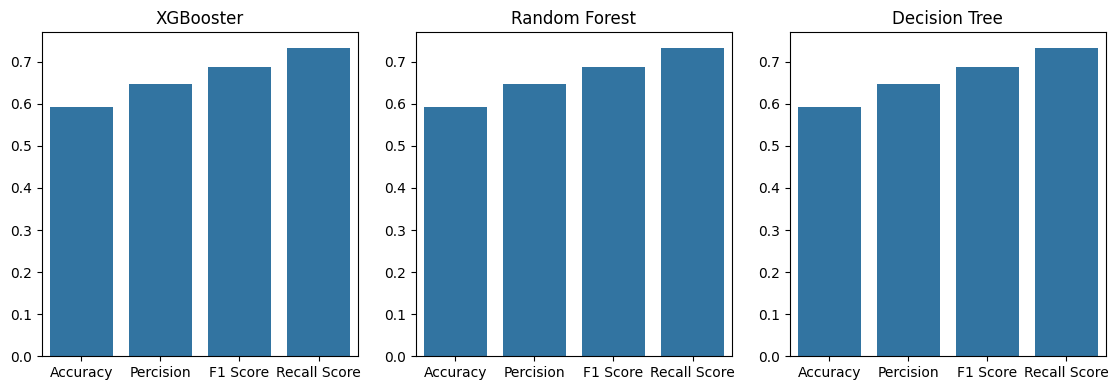

In [48]:
#Make a barplot of all Algorithms:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred)])
plt.title('XGBooster')
plt.subplot(1, 4, 2)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred)])
plt.title('Random Forest')            
plt.subplot(1, 4, 3)
sns.barplot(x = ['Accuracy', 'Percision', 'F1 Score', 'Recall Score'],
            y = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred)])
plt.title('Decision Tree')
plt.tight_layout()
plt.show()